<a href="https://colab.research.google.com/github/yuvabharathib/Transfer-Learning-for-binary-classification/blob/main/ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# GRADED FUNCTION: train_val_datasets

def train_val_datasets():
    """Creates training and validation datasets

    Returns:
        (tf.data.Dataset, tf.data.Dataset): training and validation datasets
    """

    ### START CODE HERE ###

    training_dataset = tf.keras.utils.image_dataset_from_directory(
        directory='/content/horse-or-human.zip',
        batch_size=32,
        image_size=(150, 150),
        shuffle=True,
        seed=7
    )

    validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory='/content/validation-horse-or-human.zip',
        batch_size=32,
        image_size=(150, 150),
        shuffle=True,
        seed=7
    )

    ### END CODE HERE ###

    # Correct indentation for the return statement
    return training_dataset, validation_dataset


In [ ]:

path_inception = '/content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop .h5'

# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file ='/content/inception_v3_weights_tf_dim_ordering_tf_kernels_notop .h5'
pre_trained_model = InceptionV3(include_top = False,
                                input_shape = (150, 150, 3),
                                weights = None)


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Load pre-trained InceptionV3 model with weights from 'imagenet'
pre_trained_model = InceptionV3(include_top=False,
                                input_shape=(150, 150, 3),
                                weights='imagenet')

# Make all layers non-trainable
for layer in pre_trained_model.layers:
    layer.trainable = False

# Display model summary
pre_trained_model.summary()


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_564 (Conv2D)       │ (None, 74, 74, 32)     │            864 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_564   │ (None, 74, 74, 32)     │             96 │ conv2d_564[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_564            │ (None, 74, 74, 32)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_565 (Conv2D)       │ (None, 72, 72, 32)     │          9,216 │ activation_564[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_565   │ (None, 72, 72, 32)     │             96 │ conv2d_565[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_565            │ (None, 72, 72, 32)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_566 (Conv2D)       │ (None, 72, 72, 64)     │         18,432 │ activation_565[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_566   │ (None, 72, 72, 64)     │            192 │ conv2d_566[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_566            │ (None, 72, 72, 64)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_24          │ (None, 35, 35, 64)     │              0 │ activation_566[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_567 (Conv2D)       │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d_24[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_567   │ (None, 35, 35, 80)     │            240 │ conv2d_567[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_567            │ (None, 35, 35, 80)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_568 (Conv2D)  

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output


last layer output shape:  (None, 7, 7, 768)


In [ ]:

# Define a Callback class that stops training once accuracy reaches 99.9%
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy']>0.970:
            self.model.stop_training = True
            print("\nReached 97.0% accuracy so cancelling training!")


In [ ]:

# GRADED FUNCTION: output_of_last_layer

def output_of_last_layer(pre_trained_model):
    """Fetches the output of the last desired layer of the pre-trained model

    Args:
        pre_trained_model (tf.keras.Model): pre-trained model

    Returns:
        tf.keras.KerasTensor: last desired layer of pretrained model
    """
    ### START CODE HERE ###

    last_desired_layer = pre_trained_model.get_layer('mixed7')
    last_output = last_desired_layer.output

    print('last layer output shape: ', last_output.shape)

    ### END CODE HERE ###

    return last_output


In [ ]:
# Import all the necessary files!
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd
from tensorflow.keras.optimizers import RMSprop


def create_final_model(pre_trained_model, last_output):

 # Flatten the output layer of the pretrained model to 1 dimension
    x = tf.keras.layers.Flatten()(last_output)

    ### START CODE HERE ###

    # Add a fully connected layer with 1024 hidden units and ReLU activation
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    # Add a dropout rate of 0.2
    x = tf.keras.layers.Dropout(0.2)(x)
    # Add a final sigmoid layer for classification
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=pre_trained_model.input, outputs=x)
 # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001),
        loss='binary_crossentropy', # use a loss for binary classification
        metrics=['accuracy']
    )

    ### END CODE HERE ###
    return model #return the model object

# assign the result of the function call to the variable model
model = create_final_model(pre_trained_model, last_output)


# Get the Horse or Human dataset
path_horse_or_human = '/content/horse-or-human.zip'
# Get the Horse or Human Validation dataset
path_validation_horse_or_human = '/content/validation-horse-or-human.zip'
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = path_horse_or_human
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/training')
zip_ref.close()

local_zip = path_validation_horse_or_human
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation')
zip_ref.close()

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_564 (Conv2D)       │ (None, 74, 74, 32)     │            864 │ input_layer_6[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_564   │ (None, 74, 74, 32)     │             96 │ conv2d_564[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_564            │ (None, 74, 74, 32)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_565 (Conv2D)       │ (None, 72, 72, 32)     │          9,216 │ activation_564[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_565   │ (None, 72, 72, 32)     │             96 │ conv2d_565[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_565            │ (None, 72, 72, 32)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_566 (Conv2D)       │ (None, 72, 72, 64)     │         18,432 │ activation_565[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_566   │ (None, 72, 72, 64)     │            192 │ conv2d_566[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_566            │ (None, 72, 72, 64)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_24          │ (None, 35, 35, 64)     │              0 │ activation_566[0][0]   │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_567 (Conv2D)       │ (None, 35, 35, 80)     │          5,120 │ max_pooling2d_24[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_567   │ (None, 35, 35, 80)     │            240 │ conv2d_567[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_567            │ (None, 35, 35, 80)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_568 (Conv2D)  

 Total params: 47,512,481 (181.25 MB)

 Trainable params: 38,537,217 (147.01 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [ ]:

# Define our example directories and files
train_dir = '/tmp/training'
validation_dir = '/tmp/validation'

train_horses_dir = os.path.join(train_dir, 'horses')
train_humans_dir = os.path.join(train_dir, 'humans')
validation_horses_dir = os.path.join(validation_dir, 'horses')
validation_humans_dir = os.path.join(validation_dir, 'humans')

train_horses_fnames = os.listdir(train_horses_dir)
train_humans_fnames = os.listdir(train_humans_dir)
validation_horses_fnames = os.listdir(validation_horses_dir)
validation_humans_fnames = os.listdir(validation_humans_dir)

print(len(train_horses_fnames))
print(len(train_humans_fnames))
print(len(validation_horses_fnames))
print(len(validation_humans_fnames))

500
527
128
128


In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  height_shift_range = 0.2,
                                  width_shift_range = 0.2,
                                  horizontal_flip = True,
                                  vertical_flip = True,
                                  rotation_range = 0.4,
                                  shear_range = 0.1,
                                  zoom_range = 0.3,
                                  fill_mode = 'nearest'
                                  )

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1/255)


In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 20,
                                                   class_mode = 'binary',
                                                   shuffle = True)

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                        target_size = (150, 150),
                                                        batch_size =20,
                                                        class_mode = 'binary',
                                                        shuffle = False)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:

callbacks = EarlyStoppingCallback()
history = model.fit(train_generator,
    validation_data = validation_generator,
    epochs = 100,
    verbose = 2,
    callbacks = [EarlyStoppingCallback()],
)

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 - 120s - 2s/step - accuracy: 0.9426 - loss: 0.2373 - val_accuracy: 0.9844 - val_loss: 0.0575
Epoch 2/100

Reached 97.0% accuracy so cancelling training!
52/52 - 128s - 2s/step - accuracy: 0.9727 - loss: 0.0931 - val_accuracy: 0.9922 - val_loss: 0.0272


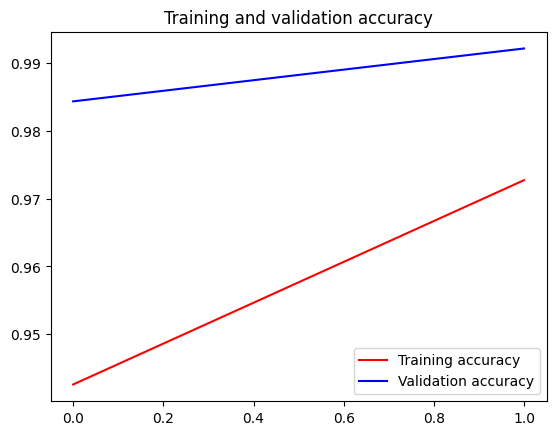

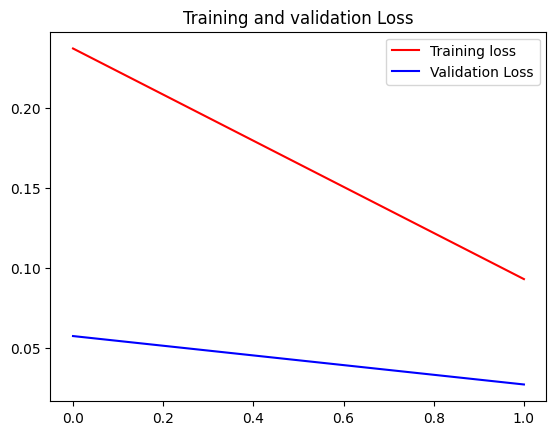

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Name: Yuvabharathi  Register Number: 212222230181  ')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()z